# EXPLORATORY DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
Cars_data=pd.read_excel(r"C:\Users\Madan\Downloads\Cars_data.xlsx")
Cars_df=pd.DataFrame(Cars_data)

In [3]:
Cars_df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
Cars_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [5]:
Cars_df[Cars_df['normalized-losses']=='?'].count()

symboling            41
normalized-losses    41
make                 41
fuel-type            41
body-style           41
drive-wheels         41
engine-location      41
width                41
height               41
engine-type          41
engine-size          41
horsepower           41
city-mpg             41
highway-mpg          41
price                41
dtype: int64

Normalized losses has 41 "?" value, which is not appropriate.Thus,dropping the column

In [68]:
Cars_df.drop(columns=["normalized-losses"],inplace=True)
Cars_df.drop(columns=["engine-location"],inplace=True)

Similarly, Horsepower column contains integer but considered has object (ie. it also contains "?")  

In [7]:
Cars_df[Cars_df['horsepower']=="?"].index

Index([130, 131], dtype='int64')

In [69]:
Cars_df.drop(index=[130,131],inplace=True)

Converting string to numeric 

In [70]:
Cars_df['drive-wheels']=Cars_df['drive-wheels'].str.replace("fwd",'3')
Cars_df['drive-wheels']=Cars_df['drive-wheels'].str.replace("rwd",'2')
Cars_df['drive-wheels']=Cars_df['drive-wheels'].str.replace("4wd",'1')

Cars_df['engine-type']=Cars_df['engine-type'].str.replace("dohcv",'1')
Cars_df['engine-type']=Cars_df['engine-type'].str.replace("ohcf",'2')
Cars_df['engine-type']=Cars_df['engine-type'].str.replace("dohc",'7')
Cars_df['engine-type']=Cars_df['engine-type'].str.replace("ohcv",'6')
Cars_df['engine-type']=Cars_df['engine-type'].str.replace("ohc",'5')
Cars_df['engine-type']=Cars_df['engine-type'].str.replace("l",'4')
Cars_df['engine-type']=Cars_df['engine-type'].str.replace("rotor",'3')

Cars_df['drive-wheels']=Cars_df['drive-wheels'].str.replace("fwd",'3')
Cars_df['drive-wheels']=Cars_df['drive-wheels'].str.replace("rwd",'2')
Cars_df['drive-wheels']=Cars_df['drive-wheels'].str.replace("4wd",'1')

In [71]:
Cars_df['horsepower']=Cars_df['horsepower'].apply(pd.to_numeric)
Cars_df['drive-wheels']=Cars_df['drive-wheels'].apply(pd.to_numeric)
Cars_df['engine-type']=Cars_df['engine-type'].apply(pd.to_numeric)

In [59]:
car_num = Cars_df.select_dtypes(["int32","int64","float64"])
car_num.head()

,symboling,drive-wheels,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,2,64.1,48.8,7,130,111,21,27,13495
1,3,2,64.1,48.8,7,130,111,21,27,16500
2,1,2,65.5,52.4,6,152,154,19,26,16500
3,2,3,66.2,54.3,5,109,102,24,30,13950
4,2,1,66.4,54.3,5,136,115,18,22,17450


In [13]:
# saving the file for further models.
car_num.to_csv(r"C:\Users\Madan\Downloads\car_num.csv")

In [60]:
car_num.describe()

,symboling,drive-wheels,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.832512,2.536946,65.901478,53.733498,4.842365,126.857143,104.256158,25.241379,30.748768,13263.266010
std,1.247384,0.582215,2.154835,2.442864,1.078493,41.845239,39.714369,6.570702,6.920406,7933.310625
min,-2.000000,1.000000,60.300000,47.800000,1.000000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,64.050000,52.000000,5.000000,97.000000,70.000000,19.000000,25.000000,7781.500000
50%,1.000000,3.000000,65.500000,54.100000,5.000000,119.000000,95.000000,24.000000,30.000000,10595.000000
75%,2.000000,3.000000,66.900000,55.500000,5.000000,143.000000,116.000000,30.000000,35.000000,16501.500000
max,3.000000,3.000000,72.300000,59.800000,7.000000,326.000000,288.000000,49.000000,54.000000,45400.000000


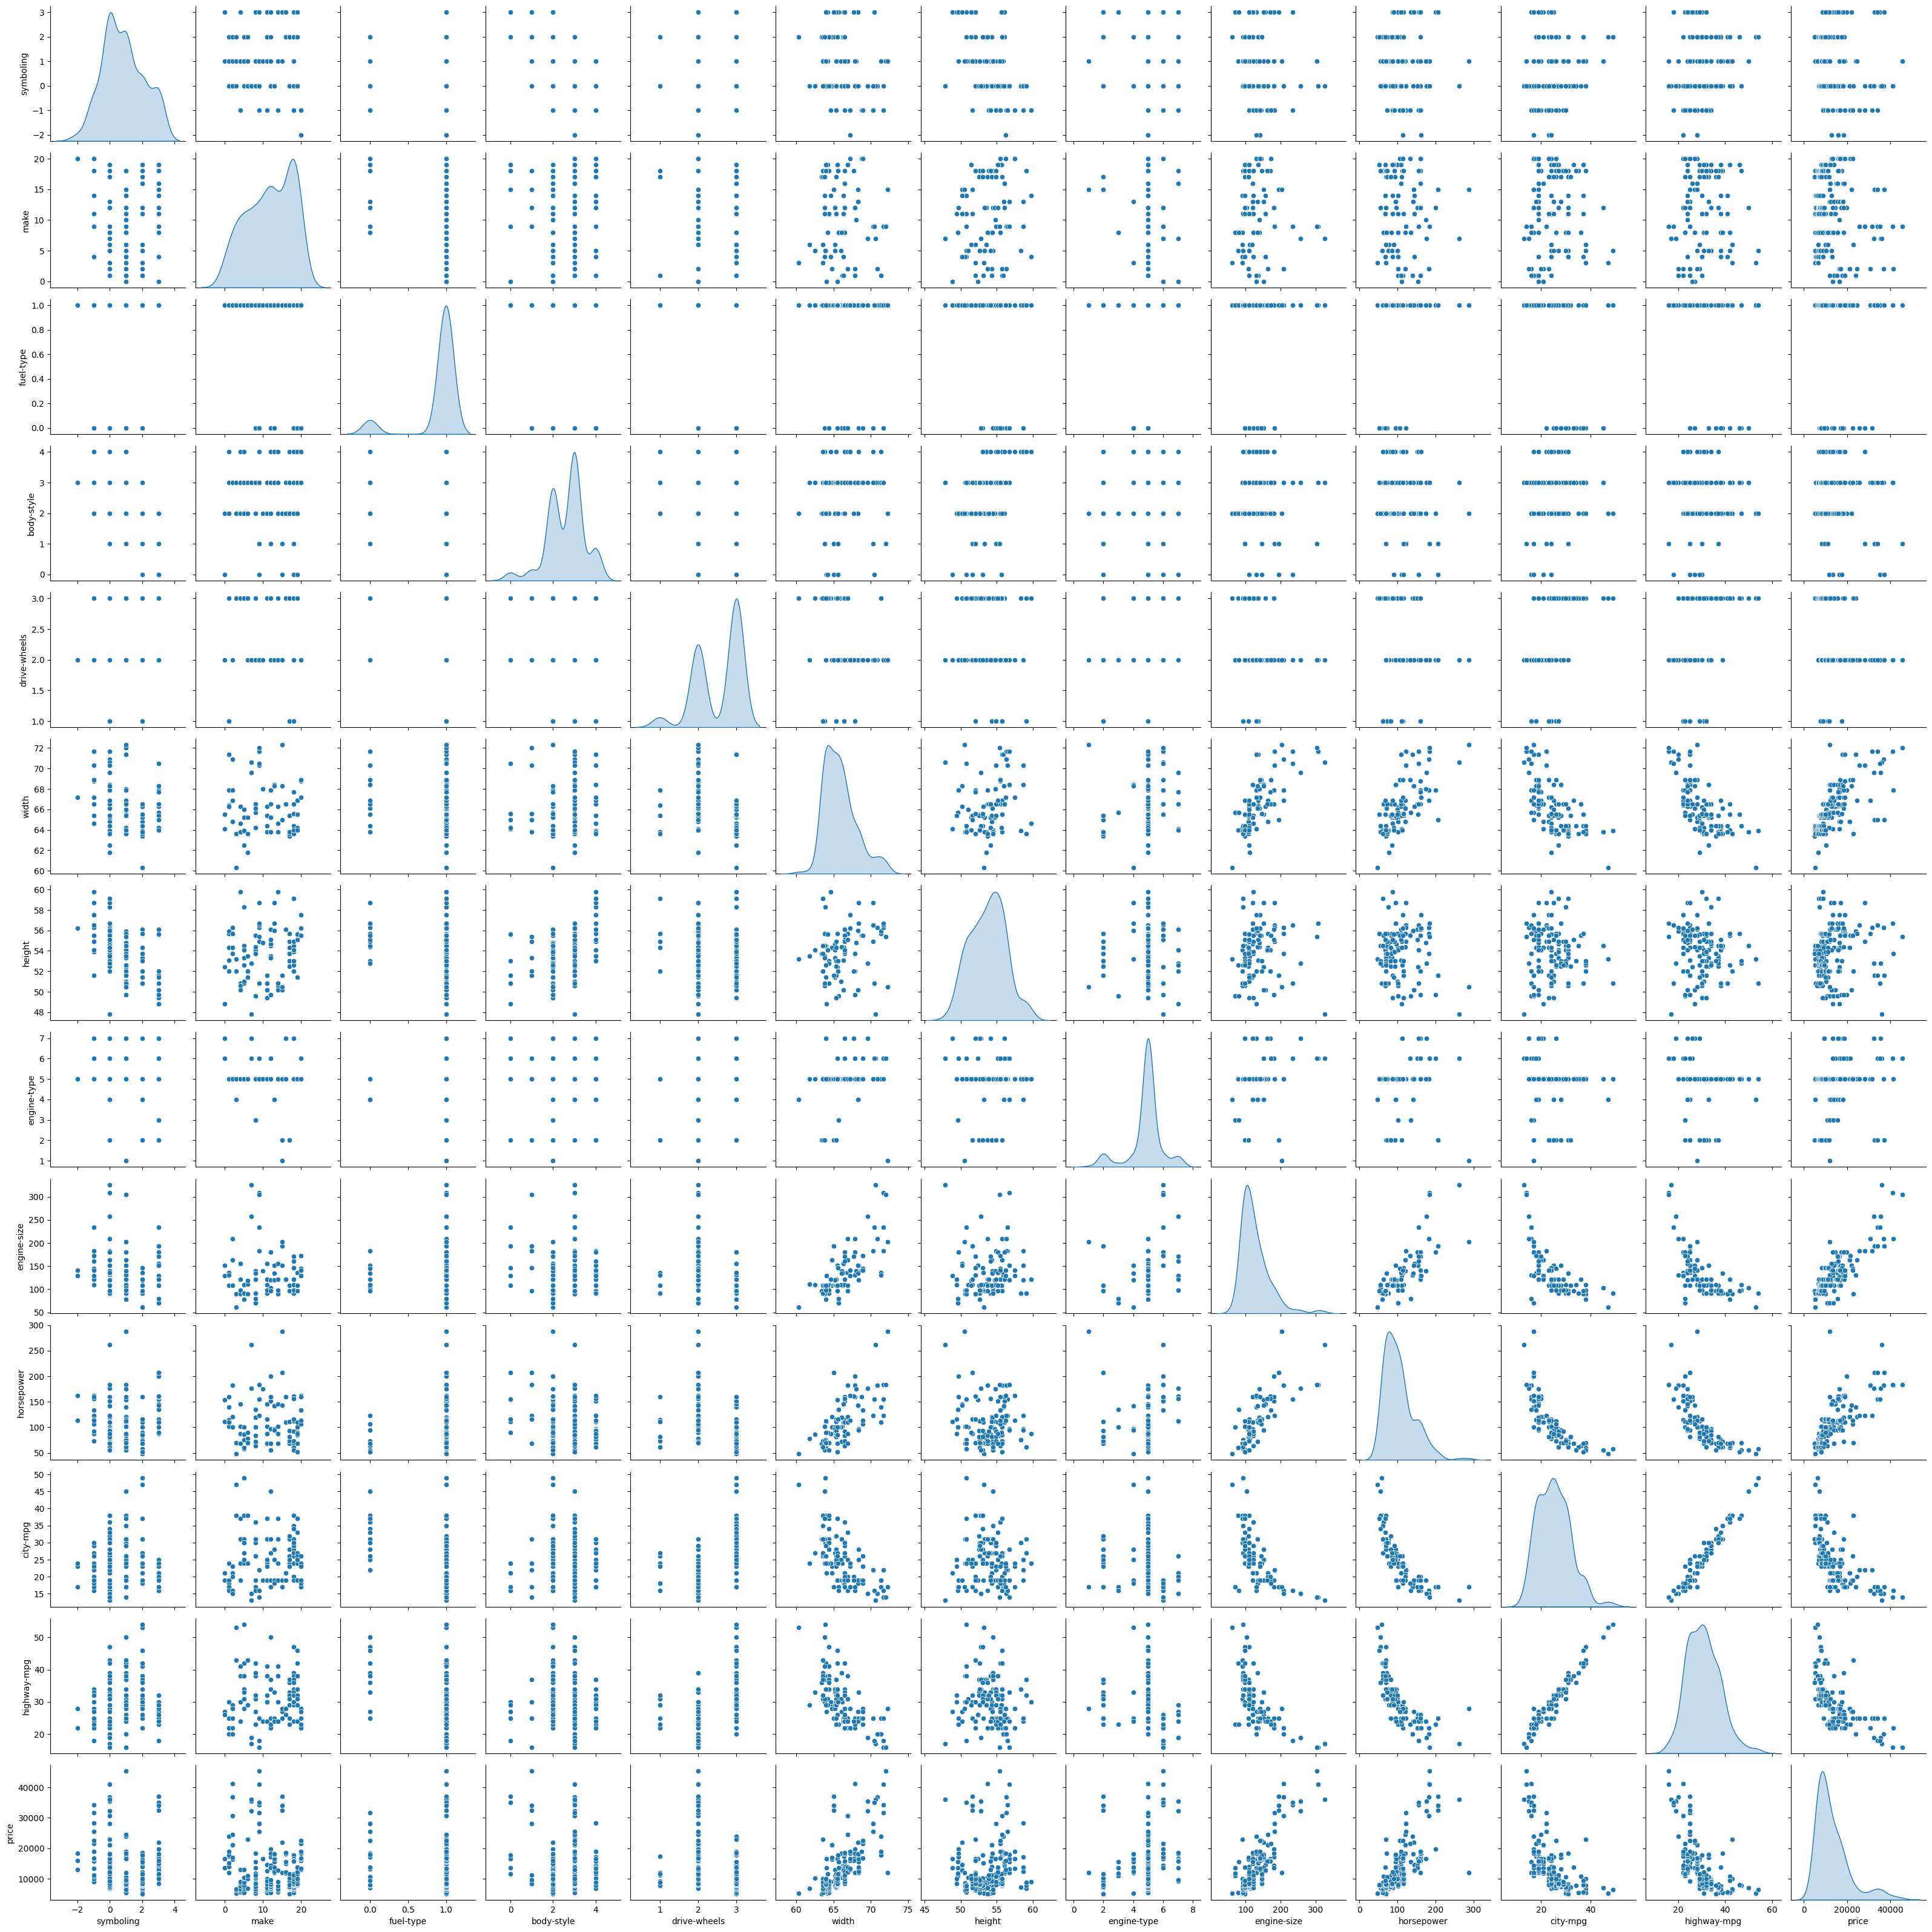

In [15]:
sns.pairplot(car_num,diag_kind='kde')

<Axes: >

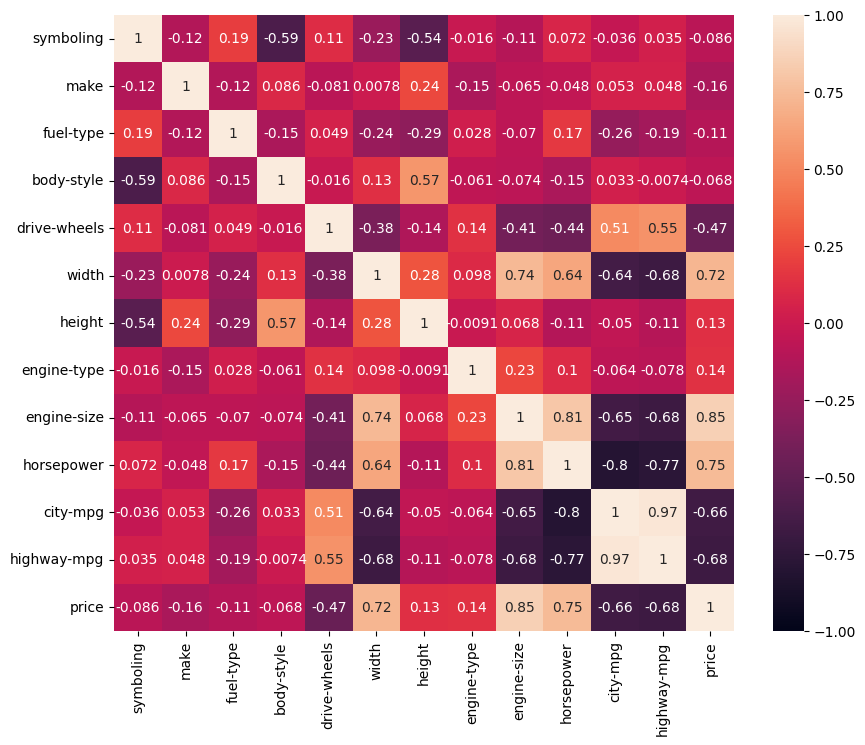

In [16]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10,8))
sns.heatmap(ax=ax,data=car_num.corr(),annot=True,vmin=-1,vmax=1)

# Linear Regression

Simple Linear Regression

cross_validation_scores =  [0.75454249 0.82287347 0.58539546 0.39995234]
cv_mean_score =  0.6406909404695191


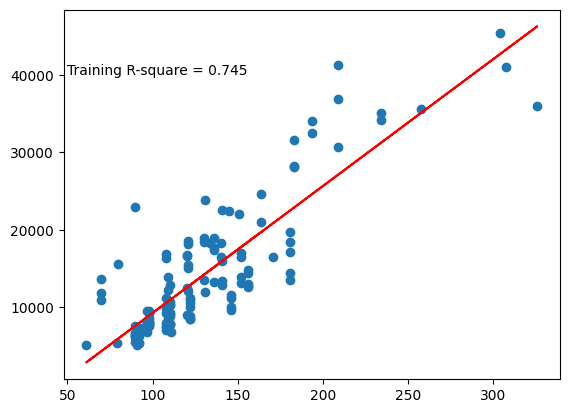

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

x=car_num['engine-size']
y=car_num['price']

X=np.array(x).reshape(-1,1)
Y=np.array(y).reshape(-1,1)
reg=LinearRegression().fit(X,Y)
cv_score=cross_val_score(reg,X,Y,cv=4)
print("cross_validation_scores = ",cv_score)
print("cv_mean_score = ",cv_score.mean())

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=20)

X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)
Y_train=np.array(Y_train).reshape(-1,1)
Y_test=np.array(Y_test).reshape(-1,1)

reg=LinearRegression().fit(X_train,Y_train)
Y_predict=reg.predict(X_train)

plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_predict,color="red")
plt.annotate("Training R-square = {:.3f}".format(r2_score(Y_train, Y_predict)), (50, 40000))
plt.show()

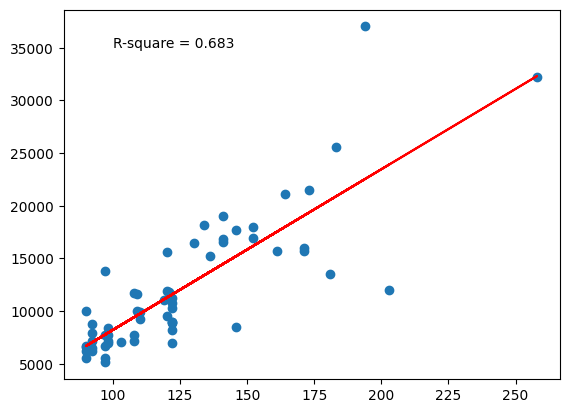

In [18]:
reg_test=LinearRegression().fit(X_test,Y_test)
Y_predict_test=reg_test.predict(X_test)

plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_predict_test,color="red")
plt.annotate("R-square = {:.3f}".format(r2_score(Y_test, Y_predict_test)), (100, 35000))
plt.show()

# Multi-linear Regression

In [72]:
Cars_df=pd.get_dummies (Cars_df,columns=['make','fuel-type','body-style'],dtype=int)
# print(Cars_df)

In [73]:
X=Cars_df.drop(columns='price')
Y=Cars_df.loc[:,['price']]

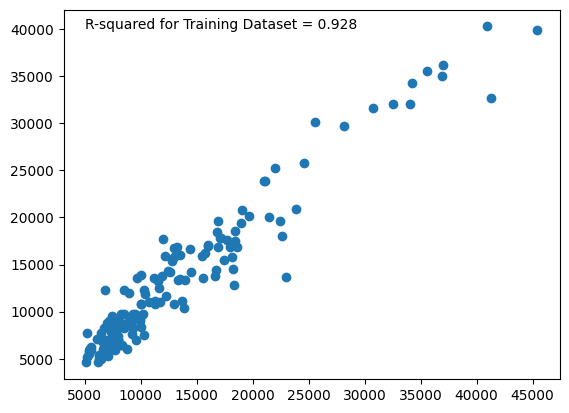

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=10)

reg=LinearRegression().fit(X_train,Y_train)
reg.score(X_train,Y_train)
reg.coef_
reg.intercept_
Y_predict_train=reg.predict(X_train)

plt.scatter(Y_train,Y_predict_train)
plt.annotate("R-squared for Training Dataset = {:.3f}".format(r2_score(Y_train, Y_predict_train)), (5000,40000))
plt.show()

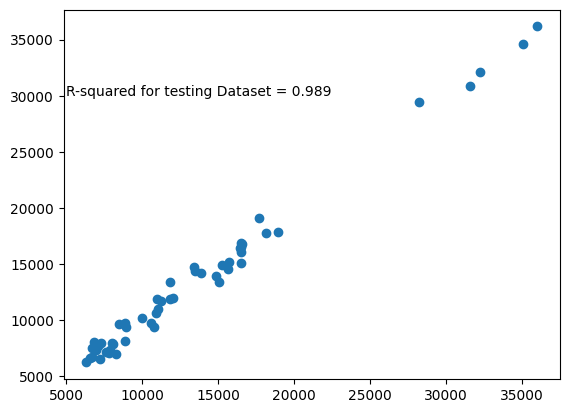

In [75]:
reg=LinearRegression().fit(X_test,Y_test)
reg.score(X_test,Y_test)
reg.coef_
reg.intercept_
Y_predict_test=reg.predict(X_test)

plt.scatter(Y_test,Y_predict_test)
plt.annotate("R-squared for testing Dataset = {:.3f}".format(r2_score(Y_test, Y_predict_test)), (5000,30000))
plt.show()

In [104]:
Cars_df.to_csv(r"C:\Users\Madan\Downloads\Cars.csv")